In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

In [2]:
data_path = '/Users/jiahuali1991/Dropbox/Machine Learning/Data/rockpaperscissors/training data/'

print(os.listdir(data_path))

train_paper_dir = os.path.join(data_path + 'paper')
train_rock_dir = os.path.join(data_path + 'rock')
train_scissors_dir = os.path.join(data_path + 'scissors')

['paper', '.DS_Store', 'rock', 'scissors']


In [3]:
train_paper_dir

'/Users/jiahuali1991/Dropbox/Machine Learning/Data/rockpaperscissors/training data/paper'

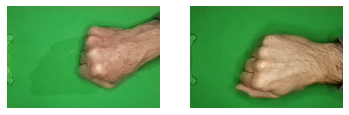

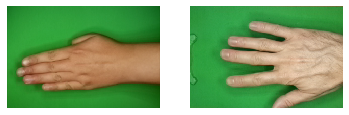

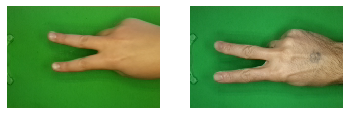

In [4]:
# visualizing the data
n = 2
for f in [train_rock_dir, train_paper_dir, train_scissors_dir]:
    for i in range(n):
        sp = plt.subplot(1, n, i + 1)
        sp.axis('Off')
        img = mpimg.imread(f + "/" + os.listdir(f)[i])
        plt.imshow(img)
    plt.show()

In [5]:
# callbacks class definition
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('acc') > 0.96):
            print()
            print("Reached almost 96% accuracy so cancelling training!")
            self.model.stop_training = True


callbacks = callBack()

In [6]:
# model creation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 35, 64)        0         
____

In [7]:
# train/validation split using ImageDataGenerator
_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = _datagen.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

validation_generator = _datagen.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


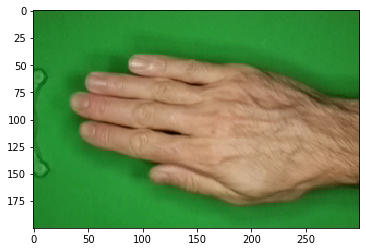

[1. 0. 0.]


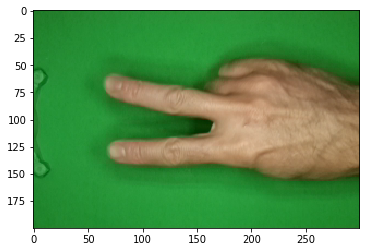

[0. 0. 1.]


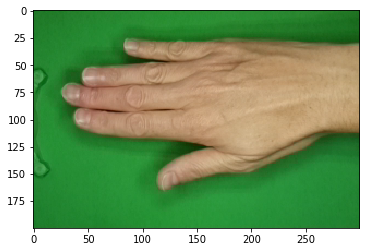

[1. 0. 0.]


In [8]:
# the first 3 images with the corresponding labels
x, y = train_generator.next()
plt.imshow(x[0], interpolation='nearest')
plt.show()
print(y[0])

plt.imshow(x[1], interpolation='nearest')
plt.show()
print(y[1])

plt.imshow(x[2], interpolation='nearest')
plt.show()
print(y[2])

In [9]:
# model training
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples / train_generator.batch_size - 1,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples / validation_generator.batch_size - 1,
    callbacks=[callbacks]
)

print(history.epoch, history.history['acc'][-1])

Epoch 1/15
13/12 [==============================] - 123s 9s/step - loss: 1.2147 - acc: 0.4313 - val_loss: 0.8732 - val_acc: 0.6442
Epoch 2/15
13/12 [==============================] - 131s 10s/step - loss: 0.6820 - acc: 0.7190 - val_loss: 0.5245 - val_acc: 0.8317
Epoch 3/15
13/12 [==============================] - 134s 10s/step - loss: 0.4154 - acc: 0.8595 - val_loss: 0.3225 - val_acc: 0.9038
Epoch 4/15
13/12 [==============================] - 124s 10s/step - loss: 0.2406 - acc: 0.9207 - val_loss: 0.2435 - val_acc: 0.9111
Epoch 5/15
13/12 [==============================] - 123s 9s/step - loss: 0.1485 - acc: 0.9538 - val_loss: 0.1242 - val_acc: 0.9543
Epoch 6/15
12/12 [===========================>..] - ETA: 5s - loss: 0.1120 - acc: 0.9652 
Reached almost 96% accuracy so cancelling training!
13/12 [==============================] - 117s 9s/step - loss: 0.1115 - acc: 0.9655 - val_loss: 0.0915 - val_acc: 0.9663
[0, 1, 2, 3, 4, 5] 0.965496


In [47]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

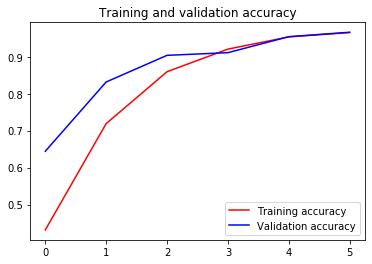

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()